<a href="https://colab.research.google.com/github/elio-li/CSCI-4964/blob/main/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 2**

## **Question A**

Generate a random network with model G(N, p) where N is the number of nodes and p is the linking probability.

In [16]:
import matplotlib.pyplot as plt
import networkx as nx
import random

def gen_rand_network(N,p):
  G = nx.Graph()
  # add nodes to the graph G
  for i in range (0, N):
	  G.add_node(i)
  
  # for every links between each node
  for i in range (0, N):
    for j in range (i, N):
      # if p is greater than random generated number & it's not it self.
      if (random.uniform(0, 1) < p) & (i != j):
        G.add_edge(i, j)

  return G

In [17]:
p = input("Enter Probability p: ")
p = float(p)
N = input("Enter Number of Nodes N: ")
N = int(N)

# Print the predicted edges
print("The number of edges SHOULD BE: ", int((p * N * (N - 1)) / 2))

G = gen_rand_network(N,p)
print("Actual number of edges: " + str(G.number_of_edges()))

Enter Probability p: 0.4
Enter Number of Nodes N: 10
The number of edges SHOULD BE:  18
Actual number of edges: 17


## **Question B**

Produce and visualize a random network with G(N = 500, p = 0.01), and plot the degree distribution of the network. (Include the data of this network. Explain the format you save the network.)

Using the method wrote in question a, each node and edge are placed in the networkx graph object.

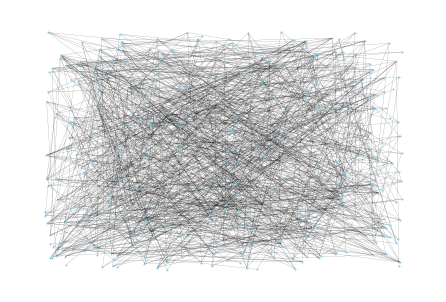

In [29]:
G = gen_rand_network(500,0.01)
nx.draw(G, 
        node_color='skyblue', node_size=1, 
        width=0.1, edge_cmap=plt.cm.OrRd,
        arrowstyle='->',arrowsize=0.1,
        pos=nx.random_layout(G, seed=13))

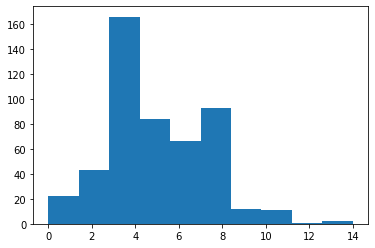

In [30]:
degrees = [G.degree(n) for n in G.nodes()]
plt.hist(degrees)
plt.show()

## **Question C**

Produce and 500 random networks with G(N = 10, 000, p = 0.001) and count the number of links, Li (i = 1,2,...,100), in network i. Then, plot the distribution of L. (Include the list of Li, but do not submit the data of the networks.)

## **Question D**

Generate a random network with model G(N, k) where N is the number of nodes and k is the average degree of this network.

## **Question E**

Produce and visualize a random network with G(N = 500, k = 10), and plot the degree distribution of the network. (Include the data of this network. Explain the format you save the network. )

## **Question F**

Randomly remove 50% of nodes from the network in b), calculate the average degree of the rest of the network.

## **Question G**

What are the sizes of largest cluster and second largest cluster in the rest of network in f)?

## **Question H**

Randomly remove 70% of nodes from the network in e), calculate the average degree of the rest of the network.

## **Question I**

What are the sizes of largest cluster and second largest cluster in the rest of network in h).